## Interpolacja 

W poniższych zadaniach wykorzystać funkcje z ćwiczenia poprzedniego. Proszę także użyć tych samych zbiorów punktów. 




#### Imports

In [93]:
import numpy as np
import sympy as sp
import math
from tabulate import tabulate
import matplotlib.pyplot as plot
import scipy.interpolate as interpolate

#### Zadanie 1: Interpolacja metodą Newtona 
Napisać własną implementację interpolacji wielomianowej  Newtona (metoda ilorazów róznicowych). Zadbac o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji. Narysować wykres wielomianu interpolacyjnego dla tych samych danych, co w poprzednim punkcie. Oszacować dokładność (błąd interpolacji). 

In [94]:
def into_table(fun, fun_name, min_val, max_val, num):
    x = []
    y = []
    tab = []
    section = (max_val - min_val) / float(num)
    
    for i in np.arange(min_val, max_val + 0.1, section):
        x.append(i)
        y.append(fun(i))
        tab.append([i, fun(i)])
        
    print (tabulate(tab, headers=["x", fun_name], tablefmt="fancy_grid", floatfmt=".10f"))
    return x, y

def newton_polynomial(x_arr, y_arr):
    n = len(x_arr)
    X = sp.symbols("x")
    coeffs = np.copy(y_arr)
    result = 0
    
    for i in range(1, n):
        for j in range(n-1, i-1, -1):
            coeffs[j] = float(coeffs[j] - coeffs[j-1]) / float(x_arr[j] - x_arr[j-i])

    for i in range(n):
        tmp = 1
        for j in range(i):
            tmp *= (X - x_arr[j])
        result += tmp * coeffs[i]
        
    return sp.simplify(result)

def compare_part(fun1, fun2, poly, fname, min, max, n):
    tab = []
    r_err = []
    a_err = []
    section = (max - min) / float(n)

    min_val = section / 2 + min
    max_val = section / 2 + max
    
    for x in np.arange(min_val, max_val, section):
        tab.append([x, fun1(x), fun2(poly, x), abs(fun2(poly, x) - fun1(x)) / fun1(x), 
                    abs(fun2(poly, x) - fun1(x))])
                      
        r_err.append(abs(fun2(poly, x) - fun1(x)) / fun1(x))
        a_err.append(abs(fun2(poly, x) - fun1(x)))
        
    print(tabulate(tab, headers=["x", fname, "Interpolation of " + fname, "Relative error",
                                 "Absolute error"], tablefmt="fancy_grid", floatfmt=".10f"))
    
def show_graphic(fun1, fun2, poly, fname, min, max, n):
    x = []
    y1 = []
    y2 = []
    section = (max - min) / float(n)
    
    for i in np.arange(min, max+0.1, section):
        x.append(i)
        y1.append(fun1(i))
        y2.append(fun2(poly, i))

    plot.title("Graphic of interpolate polynamial for " + fname)
    plot.xlabel("X")
    plot.ylabel("Y")
    plot.plot(x, y1, label = fname)
    plot.plot(x, y2, label = "Interpolated " + fname)
    plot.legend()
    plot.show()
    
def calculate(f, x):
    X = sp.symbols("x")
    return f.evalf(subs={X: x})

def compare_fun(fun, fname, min, max, n):
    x, y = into_table(fun, fname, min, max, n)
    poly = newton_polynomial(x, y)
    compare_part(fun, calculate, poly, fname, min, max, n)
    show_graphic(fun, calculate, poly, fname, min, max, 100)
    

def compare(min, max, n):   
    compare_fun(math.sqrt, "sqrt(x)", min, max, n)
    compare_fun(math.sin, "sin(x)", min, max, n)
    compare_fun(lambda x: x**3 + 2*x, "x^3+2x", min, max, n)

Interpolacja metodą Newtona dla 3 węzłów:

╒═══════════════╤══════════════╕
│             x │      sqrt(x) │
╞═══════════════╪══════════════╡
│  0.0000000000 │ 0.0000000000 │
├───────────────┼──────────────┤
│  3.3333333333 │ 1.8257418584 │
├───────────────┼──────────────┤
│  6.6666666667 │ 2.5819888975 │
├───────────────┼──────────────┤
│ 10.0000000000 │ 3.1622776602 │
╘═══════════════╧══════════════╛
╒══════════════╤══════════════╤════════════════════════════╤══════════════════╤══════════════════╕
│            x │      sqrt(x) │   Interpolation of sqrt(x) │   Relative error │   Absolute error │
╞══════════════╪══════════════╪════════════════════════════╪══════════════════╪══════════════════╡
│ 1.6666666667 │ 1.2909944487 │               1.1024038155 │     0.1460816764 │     0.1885906332 │
├──────────────┼──────────────┼────────────────────────────┼──────────────────┼──────────────────┤
│ 5.0000000000 │ 2.2360679775 │               2.2817061964 │     0.0204100320 │     0.0456382189 │
├──────────────┼──────────────┼────────────

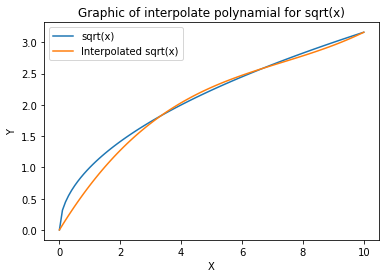

╒═══════════════╤═══════════════╕
│             x │        sin(x) │
╞═══════════════╪═══════════════╡
│  0.0000000000 │  0.0000000000 │
├───────────────┼───────────────┤
│  3.3333333333 │ -0.1905679629 │
├───────────────┼───────────────┤
│  6.6666666667 │  0.3741512306 │
├───────────────┼───────────────┤
│ 10.0000000000 │ -0.5440211109 │
╘═══════════════╧═══════════════╛
╒══════════════╤═══════════════╤═══════════════════════════╤══════════════════╤══════════════════╕
│            x │        sin(x) │   Interpolation of sin(x) │   Relative error │   Absolute error │
╞══════════════╪═══════════════╪═══════════════════════════╪══════════════════╪══════════════════╡
│ 1.6666666667 │  0.9954079578 │             -0.3295810442 │     1.3311014761 │     1.3249890019 │
├──────────────┼───────────────┼───────────────────────────┼──────────────────┼──────────────────┤
│ 5.0000000000 │ -0.9589242747 │              0.1372669075 │    -1.1431467647 │     1.0961911822 │
├──────────────┼───────────────┼

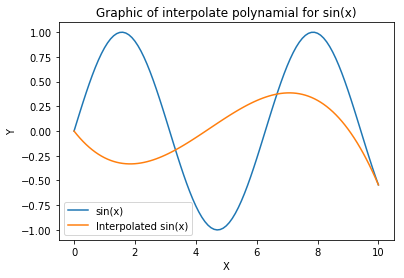

╒═══════════════╤═════════════════╕
│             x │          x^3+2x │
╞═══════════════╪═════════════════╡
│  0.0000000000 │    0.0000000000 │
├───────────────┼─────────────────┤
│  3.3333333333 │   43.7037037037 │
├───────────────┼─────────────────┤
│  6.6666666667 │  309.6296296296 │
├───────────────┼─────────────────┤
│ 10.0000000000 │ 1020.0000000000 │
╘═══════════════╧═════════════════╛
╒══════════════╤════════════════╤═══════════════════════════╤══════════════════╤══════════════════╕
│            x │         x^3+2x │   Interpolation of x^3+2x │   Relative error │   Absolute error │
╞══════════════╪════════════════╪═══════════════════════════╪══════════════════╪══════════════════╡
│ 1.6666666667 │   7.9629629630 │              7.9629629630 │     0.0000000000 │     0.0000000000 │
├──────────────┼────────────────┼───────────────────────────┼──────────────────┼──────────────────┤
│ 5.0000000000 │ 135.0000000000 │            135.0000000000 │     0.0000000000 │     0.0000000000 │
├───

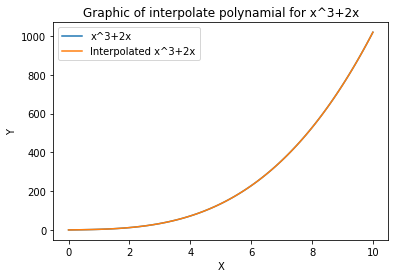

In [95]:
compare(0, 10, 3)

Interpolacja metodą Newtona dla 4 węzłów:

╒═══════════════╤══════════════╕
│             x │      sqrt(x) │
╞═══════════════╪══════════════╡
│  0.0000000000 │ 0.0000000000 │
├───────────────┼──────────────┤
│  2.5000000000 │ 1.5811388301 │
├───────────────┼──────────────┤
│  5.0000000000 │ 2.2360679775 │
├───────────────┼──────────────┤
│  7.5000000000 │ 2.7386127875 │
├───────────────┼──────────────┤
│ 10.0000000000 │ 3.1622776602 │
╘═══════════════╧══════════════╛
╒══════════════╤══════════════╤════════════════════════════╤══════════════════╤══════════════════╕
│            x │      sqrt(x) │   Interpolation of sqrt(x) │   Relative error │   Absolute error │
╞══════════════╪══════════════╪════════════════════════════╪══════════════════╪══════════════════╡
│ 1.2500000000 │ 1.1180339887 │               0.9820659964 │     0.1216134695 │     0.1359679924 │
├──────────────┼──────────────┼────────────────────────────┼──────────────────┼──────────────────┤
│ 3.7500000000 │ 1.9364916731 │               1.9596017579 │     0.011933996

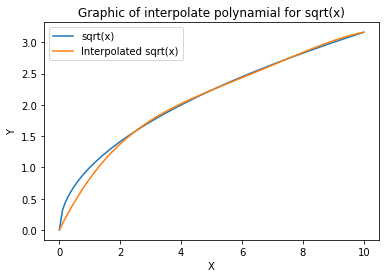

╒═══════════════╤═══════════════╕
│             x │        sin(x) │
╞═══════════════╪═══════════════╡
│  0.0000000000 │  0.0000000000 │
├───────────────┼───────────────┤
│  2.5000000000 │  0.5984721441 │
├───────────────┼───────────────┤
│  5.0000000000 │ -0.9589242747 │
├───────────────┼───────────────┤
│  7.5000000000 │  0.9379999768 │
├───────────────┼───────────────┤
│ 10.0000000000 │ -0.5440211109 │
╘═══════════════╧═══════════════╛
╒══════════════╤═══════════════╤═══════════════════════════╤══════════════════╤══════════════════╕
│            x │        sin(x) │   Interpolation of sin(x) │   Relative error │   Absolute error │
╞══════════════╪═══════════════╪═══════════════════════════╪══════════════════╪══════════════════╡
│ 1.2500000000 │  0.9489846194 │              1.4054289399 │     0.4809817896 │     0.4564443205 │
├──────────────┼───────────────┼───────────────────────────┼──────────────────┼──────────────────┤
│ 3.7500000000 │ -0.5715613187 │             -0.5530228042 │   

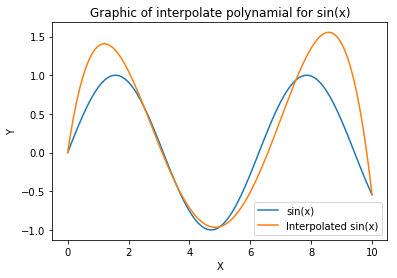

╒═══════════════╤═════════════════╕
│             x │          x^3+2x │
╞═══════════════╪═════════════════╡
│  0.0000000000 │    0.0000000000 │
├───────────────┼─────────────────┤
│  2.5000000000 │   20.6250000000 │
├───────────────┼─────────────────┤
│  5.0000000000 │  135.0000000000 │
├───────────────┼─────────────────┤
│  7.5000000000 │  436.8750000000 │
├───────────────┼─────────────────┤
│ 10.0000000000 │ 1020.0000000000 │
╘═══════════════╧═════════════════╛
╒══════════════╤════════════════╤═══════════════════════════╤══════════════════╤══════════════════╕
│            x │         x^3+2x │   Interpolation of x^3+2x │   Relative error │   Absolute error │
╞══════════════╪════════════════╪═══════════════════════════╪══════════════════╪══════════════════╡
│ 1.2500000000 │   4.4531250000 │              4.4531250000 │     0.0000000000 │     0.0000000000 │
├──────────────┼────────────────┼───────────────────────────┼──────────────────┼──────────────────┤
│ 3.7500000000 │  60.2343750000 

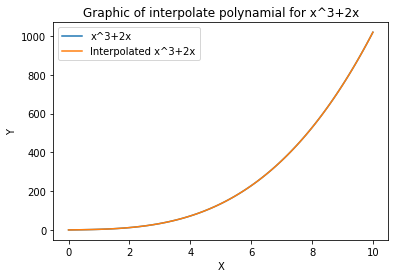

In [96]:
compare(0, 10, 4)

Interpolacja metodą Newtona dla 5 węzłów:

╒═══════════════╤══════════════╕
│             x │      sqrt(x) │
╞═══════════════╪══════════════╡
│  0.0000000000 │ 0.0000000000 │
├───────────────┼──────────────┤
│  2.0000000000 │ 1.4142135624 │
├───────────────┼──────────────┤
│  4.0000000000 │ 2.0000000000 │
├───────────────┼──────────────┤
│  6.0000000000 │ 2.4494897428 │
├───────────────┼──────────────┤
│  8.0000000000 │ 2.8284271247 │
├───────────────┼──────────────┤
│ 10.0000000000 │ 3.1622776602 │
╘═══════════════╧══════════════╛
╒══════════════╤══════════════╤════════════════════════════╤══════════════════╤══════════════════╕
│            x │      sqrt(x) │   Interpolation of sqrt(x) │   Relative error │   Absolute error │
╞══════════════╪══════════════╪════════════════════════════╪══════════════════╪══════════════════╡
│ 1.0000000000 │ 1.0000000000 │               0.8944129014 │     0.1055870986 │     0.1055870986 │
├──────────────┼──────────────┼────────────────────────────┼──────────────────┼──────────────────┤
│ 3.000000

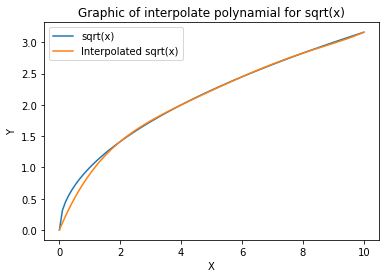

╒═══════════════╤═══════════════╕
│             x │        sin(x) │
╞═══════════════╪═══════════════╡
│  0.0000000000 │  0.0000000000 │
├───────────────┼───────────────┤
│  2.0000000000 │  0.9092974268 │
├───────────────┼───────────────┤
│  4.0000000000 │ -0.7568024953 │
├───────────────┼───────────────┤
│  6.0000000000 │ -0.2794154982 │
├───────────────┼───────────────┤
│  8.0000000000 │  0.9893582466 │
├───────────────┼───────────────┤
│ 10.0000000000 │ -0.5440211109 │
╘═══════════════╧═══════════════╛
╒══════════════╤═══════════════╤═══════════════════════════╤══════════════════╤══════════════════╕
│            x │        sin(x) │   Interpolation of sin(x) │   Relative error │   Absolute error │
╞══════════════╪═══════════════╪═══════════════════════════╪══════════════════╪══════════════════╡
│ 1.0000000000 │  0.8414709848 │              1.4133655930 │     0.6796367534 │     0.5718946082 │
├──────────────┼───────────────┼───────────────────────────┼──────────────────┼───────────────

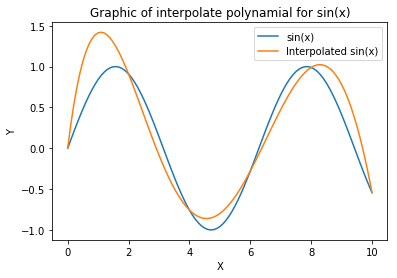

╒═══════════════╤═════════════════╕
│             x │          x^3+2x │
╞═══════════════╪═════════════════╡
│  0.0000000000 │    0.0000000000 │
├───────────────┼─────────────────┤
│  2.0000000000 │   12.0000000000 │
├───────────────┼─────────────────┤
│  4.0000000000 │   72.0000000000 │
├───────────────┼─────────────────┤
│  6.0000000000 │  228.0000000000 │
├───────────────┼─────────────────┤
│  8.0000000000 │  528.0000000000 │
├───────────────┼─────────────────┤
│ 10.0000000000 │ 1020.0000000000 │
╘═══════════════╧═════════════════╛
╒══════════════╤════════════════╤═══════════════════════════╤══════════════════╤══════════════════╕
│            x │         x^3+2x │   Interpolation of x^3+2x │   Relative error │   Absolute error │
╞══════════════╪════════════════╪═══════════════════════════╪══════════════════╪══════════════════╡
│ 1.0000000000 │   3.0000000000 │              3.0000000000 │     0.0000000000 │     0.0000000000 │
├──────────────┼────────────────┼───────────────────────────

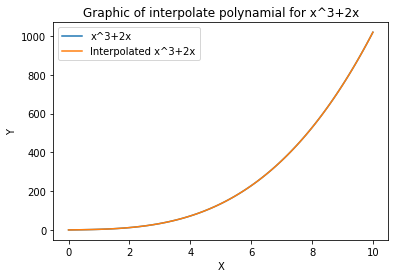

In [97]:
compare(0, 10, 5)

Interpolacja metodą Newtona dla 8 węzłów:

╒═══════════════╤══════════════╕
│             x │      sqrt(x) │
╞═══════════════╪══════════════╡
│  0.0000000000 │ 0.0000000000 │
├───────────────┼──────────────┤
│  1.2500000000 │ 1.1180339887 │
├───────────────┼──────────────┤
│  2.5000000000 │ 1.5811388301 │
├───────────────┼──────────────┤
│  3.7500000000 │ 1.9364916731 │
├───────────────┼──────────────┤
│  5.0000000000 │ 2.2360679775 │
├───────────────┼──────────────┤
│  6.2500000000 │ 2.5000000000 │
├───────────────┼──────────────┤
│  7.5000000000 │ 2.7386127875 │
├───────────────┼──────────────┤
│  8.7500000000 │ 2.9580398915 │
├───────────────┼──────────────┤
│ 10.0000000000 │ 3.1622776602 │
╘═══════════════╧══════════════╛
╒══════════════╤══════════════╤════════════════════════════╤══════════════════╤══════════════════╕
│            x │      sqrt(x) │   Interpolation of sqrt(x) │   Relative error │   Absolute error │
╞══════════════╪══════════════╪════════════════════════════╪══════════════════╪══════════════════╡
│ 0.625000

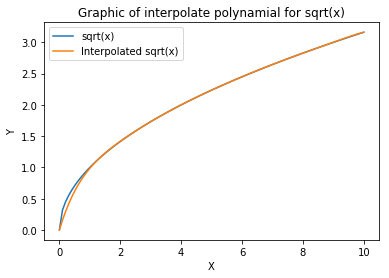

╒═══════════════╤═══════════════╕
│             x │        sin(x) │
╞═══════════════╪═══════════════╡
│  0.0000000000 │  0.0000000000 │
├───────────────┼───────────────┤
│  1.2500000000 │  0.9489846194 │
├───────────────┼───────────────┤
│  2.5000000000 │  0.5984721441 │
├───────────────┼───────────────┤
│  3.7500000000 │ -0.5715613187 │
├───────────────┼───────────────┤
│  5.0000000000 │ -0.9589242747 │
├───────────────┼───────────────┤
│  6.2500000000 │ -0.0331792165 │
├───────────────┼───────────────┤
│  7.5000000000 │  0.9379999768 │
├───────────────┼───────────────┤
│  8.7500000000 │  0.6247239538 │
├───────────────┼───────────────┤
│ 10.0000000000 │ -0.5440211109 │
╘═══════════════╧═══════════════╛
╒══════════════╤═══════════════╤═══════════════════════════╤══════════════════╤══════════════════╕
│            x │        sin(x) │   Interpolation of sin(x) │   Relative error │   Absolute error │
╞══════════════╪═══════════════╪═══════════════════════════╪══════════════════╪═════════

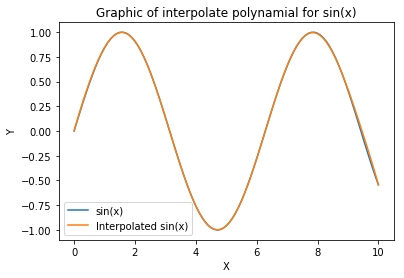

╒═══════════════╤═════════════════╕
│             x │          x^3+2x │
╞═══════════════╪═════════════════╡
│  0.0000000000 │    0.0000000000 │
├───────────────┼─────────────────┤
│  1.2500000000 │    4.4531250000 │
├───────────────┼─────────────────┤
│  2.5000000000 │   20.6250000000 │
├───────────────┼─────────────────┤
│  3.7500000000 │   60.2343750000 │
├───────────────┼─────────────────┤
│  5.0000000000 │  135.0000000000 │
├───────────────┼─────────────────┤
│  6.2500000000 │  256.6406250000 │
├───────────────┼─────────────────┤
│  7.5000000000 │  436.8750000000 │
├───────────────┼─────────────────┤
│  8.7500000000 │  687.4218750000 │
├───────────────┼─────────────────┤
│ 10.0000000000 │ 1020.0000000000 │
╘═══════════════╧═════════════════╛
╒══════════════╤════════════════╤═══════════════════════════╤══════════════════╤══════════════════╕
│            x │         x^3+2x │   Interpolation of x^3+2x │   Relative error │   Absolute error │
╞══════════════╪════════════════╪═══════════

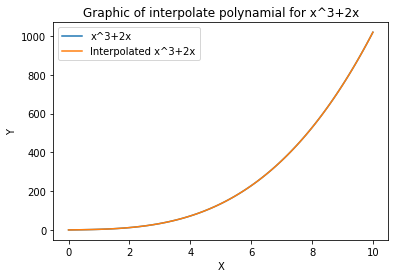

In [98]:
compare(0, 10, 8)

#### Zadanie 2: Interpolacj metodą Hermite'a 
Napisać odpowiedni algorytm dla interpolacji Hermite'a. Wizualiacja wyników podobnie jak poprzednio. Oszacować dokładność (błąd interpolacji). 

In [99]:
def hermite_polynomial(x_arr, y_arr):
    n = len(x_arr)
    X = sp.symbols("x")
    derivs = [0] * n
    poly = 0
    
    for i in range(1, n):
        if x_arr[i] == x_arr[i-1]:
            derivs[i] = derivs[i-1] + 1
        else:
            derivs[i] = 0
            
    for i in range(1, n):
        for j in range(n-1, i-1, -1):
            if derivs[j] == 0:
                y_arr[j] = \
                    (y_arr[j] - y_arr[int(j-1 - derivs[j-1])]) / (x_arr[j] - x_arr[j - i])
            else:
                y_arr[j] /= float(i)
                derivs[j] -= 1
                
    for i in range(n - 1, -1, -1):
        for j in range(i, n - 1, 1):
            y_arr[j] = y_arr[j] - y_arr[j+1] * x_arr[i]
            
    for i in range(n):
        poly += y_arr[i]*pow(X, i)

    return poly
    
def compare_fun2(fun, fname, min, max, n):
    x, y = into_table(fun, fname, min, max, n)
    poly = hermite_polynomial(x, y)
    compare_part(fun, calculate, poly, fname, min, max, n)
    show_graphic(fun, calculate, poly, fname, min, max, 100)

def compare2(min, max, n):
    compare_fun2(math.sqrt, "sqrt(x)", min, max, n)
    compare_fun2(math.sin, "sin(x)", min, max, n)
    compare_fun2(lambda x: x**3 + 2*x, "x^3+2x", min, max, n)

Interpolacja metodą Hermite'a dla 3 węzłów:

╒═══════════════╤══════════════╕
│             x │      sqrt(x) │
╞═══════════════╪══════════════╡
│  0.0000000000 │ 0.0000000000 │
├───────────────┼──────────────┤
│  3.3333333333 │ 1.8257418584 │
├───────────────┼──────────────┤
│  6.6666666667 │ 2.5819888975 │
├───────────────┼──────────────┤
│ 10.0000000000 │ 3.1622776602 │
╘═══════════════╧══════════════╛
╒══════════════╤══════════════╤════════════════════════════╤══════════════════╤══════════════════╕
│            x │      sqrt(x) │   Interpolation of sqrt(x) │   Relative error │   Absolute error │
╞══════════════╪══════════════╪════════════════════════════╪══════════════════╪══════════════════╡
│ 1.6666666667 │ 1.2909944487 │               1.1024038155 │     0.1460816764 │     0.1885906332 │
├──────────────┼──────────────┼────────────────────────────┼──────────────────┼──────────────────┤
│ 5.0000000000 │ 2.2360679775 │               2.2817061964 │     0.0204100320 │     0.0456382189 │
├──────────────┼──────────────┼────────────

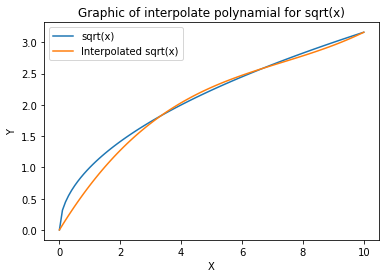

╒═══════════════╤═══════════════╕
│             x │        sin(x) │
╞═══════════════╪═══════════════╡
│  0.0000000000 │  0.0000000000 │
├───────────────┼───────────────┤
│  3.3333333333 │ -0.1905679629 │
├───────────────┼───────────────┤
│  6.6666666667 │  0.3741512306 │
├───────────────┼───────────────┤
│ 10.0000000000 │ -0.5440211109 │
╘═══════════════╧═══════════════╛
╒══════════════╤═══════════════╤═══════════════════════════╤══════════════════╤══════════════════╕
│            x │        sin(x) │   Interpolation of sin(x) │   Relative error │   Absolute error │
╞══════════════╪═══════════════╪═══════════════════════════╪══════════════════╪══════════════════╡
│ 1.6666666667 │  0.9954079578 │             -0.3295810442 │     1.3311014761 │     1.3249890019 │
├──────────────┼───────────────┼───────────────────────────┼──────────────────┼──────────────────┤
│ 5.0000000000 │ -0.9589242747 │              0.1372669075 │    -1.1431467647 │     1.0961911822 │
├──────────────┼───────────────┼

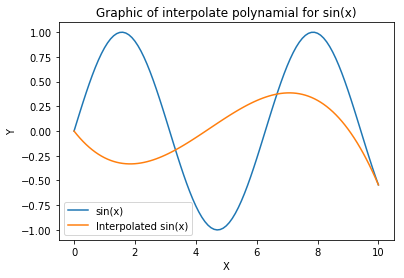

╒═══════════════╤═════════════════╕
│             x │          x^3+2x │
╞═══════════════╪═════════════════╡
│  0.0000000000 │    0.0000000000 │
├───────────────┼─────────────────┤
│  3.3333333333 │   43.7037037037 │
├───────────────┼─────────────────┤
│  6.6666666667 │  309.6296296296 │
├───────────────┼─────────────────┤
│ 10.0000000000 │ 1020.0000000000 │
╘═══════════════╧═════════════════╛
╒══════════════╤════════════════╤═══════════════════════════╤══════════════════╤══════════════════╕
│            x │         x^3+2x │   Interpolation of x^3+2x │   Relative error │   Absolute error │
╞══════════════╪════════════════╪═══════════════════════════╪══════════════════╪══════════════════╡
│ 1.6666666667 │   7.9629629630 │              7.9629629630 │     0.0000000000 │     0.0000000000 │
├──────────────┼────────────────┼───────────────────────────┼──────────────────┼──────────────────┤
│ 5.0000000000 │ 135.0000000000 │            135.0000000000 │     0.0000000000 │     0.0000000000 │
├───

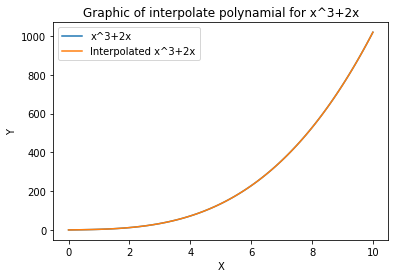

In [100]:
compare2(0, 10, 3)

Interpolacja metodą Hermite'a dla 4 węzłów:

╒═══════════════╤══════════════╕
│             x │      sqrt(x) │
╞═══════════════╪══════════════╡
│  0.0000000000 │ 0.0000000000 │
├───────────────┼──────────────┤
│  2.5000000000 │ 1.5811388301 │
├───────────────┼──────────────┤
│  5.0000000000 │ 2.2360679775 │
├───────────────┼──────────────┤
│  7.5000000000 │ 2.7386127875 │
├───────────────┼──────────────┤
│ 10.0000000000 │ 3.1622776602 │
╘═══════════════╧══════════════╛
╒══════════════╤══════════════╤════════════════════════════╤══════════════════╤══════════════════╕
│            x │      sqrt(x) │   Interpolation of sqrt(x) │   Relative error │   Absolute error │
╞══════════════╪══════════════╪════════════════════════════╪══════════════════╪══════════════════╡
│ 1.2500000000 │ 1.1180339887 │               0.9820659964 │     0.1216134695 │     0.1359679924 │
├──────────────┼──────────────┼────────────────────────────┼──────────────────┼──────────────────┤
│ 3.7500000000 │ 1.9364916731 │               1.9596017579 │     0.011933996

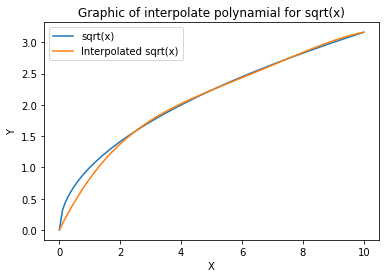

╒═══════════════╤═══════════════╕
│             x │        sin(x) │
╞═══════════════╪═══════════════╡
│  0.0000000000 │  0.0000000000 │
├───────────────┼───────────────┤
│  2.5000000000 │  0.5984721441 │
├───────────────┼───────────────┤
│  5.0000000000 │ -0.9589242747 │
├───────────────┼───────────────┤
│  7.5000000000 │  0.9379999768 │
├───────────────┼───────────────┤
│ 10.0000000000 │ -0.5440211109 │
╘═══════════════╧═══════════════╛
╒══════════════╤═══════════════╤═══════════════════════════╤══════════════════╤══════════════════╕
│            x │        sin(x) │   Interpolation of sin(x) │   Relative error │   Absolute error │
╞══════════════╪═══════════════╪═══════════════════════════╪══════════════════╪══════════════════╡
│ 1.2500000000 │  0.9489846194 │              1.4054289399 │     0.4809817896 │     0.4564443205 │
├──────────────┼───────────────┼───────────────────────────┼──────────────────┼──────────────────┤
│ 3.7500000000 │ -0.5715613187 │             -0.5530228042 │   

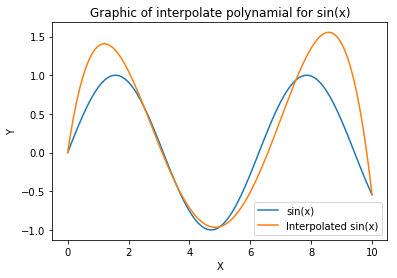

╒═══════════════╤═════════════════╕
│             x │          x^3+2x │
╞═══════════════╪═════════════════╡
│  0.0000000000 │    0.0000000000 │
├───────────────┼─────────────────┤
│  2.5000000000 │   20.6250000000 │
├───────────────┼─────────────────┤
│  5.0000000000 │  135.0000000000 │
├───────────────┼─────────────────┤
│  7.5000000000 │  436.8750000000 │
├───────────────┼─────────────────┤
│ 10.0000000000 │ 1020.0000000000 │
╘═══════════════╧═════════════════╛
╒══════════════╤════════════════╤═══════════════════════════╤══════════════════╤══════════════════╕
│            x │         x^3+2x │   Interpolation of x^3+2x │   Relative error │   Absolute error │
╞══════════════╪════════════════╪═══════════════════════════╪══════════════════╪══════════════════╡
│ 1.2500000000 │   4.4531250000 │              4.4531250000 │     0.0000000000 │     0.0000000000 │
├──────────────┼────────────────┼───────────────────────────┼──────────────────┼──────────────────┤
│ 3.7500000000 │  60.2343750000 

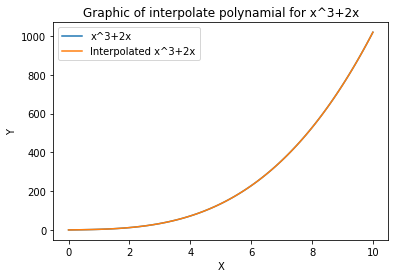

In [101]:
compare2(0, 10, 4)

Interpolacja metodą Hermite'a dla 5 węzłów:

╒═══════════════╤══════════════╕
│             x │      sqrt(x) │
╞═══════════════╪══════════════╡
│  0.0000000000 │ 0.0000000000 │
├───────────────┼──────────────┤
│  2.0000000000 │ 1.4142135624 │
├───────────────┼──────────────┤
│  4.0000000000 │ 2.0000000000 │
├───────────────┼──────────────┤
│  6.0000000000 │ 2.4494897428 │
├───────────────┼──────────────┤
│  8.0000000000 │ 2.8284271247 │
├───────────────┼──────────────┤
│ 10.0000000000 │ 3.1622776602 │
╘═══════════════╧══════════════╛
╒══════════════╤══════════════╤════════════════════════════╤══════════════════╤══════════════════╕
│            x │      sqrt(x) │   Interpolation of sqrt(x) │   Relative error │   Absolute error │
╞══════════════╪══════════════╪════════════════════════════╪══════════════════╪══════════════════╡
│ 1.0000000000 │ 1.0000000000 │               0.8944129014 │     0.1055870986 │     0.1055870986 │
├──────────────┼──────────────┼────────────────────────────┼──────────────────┼──────────────────┤
│ 3.000000

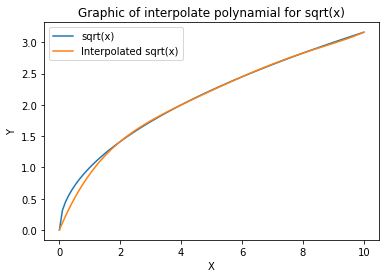

╒═══════════════╤═══════════════╕
│             x │        sin(x) │
╞═══════════════╪═══════════════╡
│  0.0000000000 │  0.0000000000 │
├───────────────┼───────────────┤
│  2.0000000000 │  0.9092974268 │
├───────────────┼───────────────┤
│  4.0000000000 │ -0.7568024953 │
├───────────────┼───────────────┤
│  6.0000000000 │ -0.2794154982 │
├───────────────┼───────────────┤
│  8.0000000000 │  0.9893582466 │
├───────────────┼───────────────┤
│ 10.0000000000 │ -0.5440211109 │
╘═══════════════╧═══════════════╛
╒══════════════╤═══════════════╤═══════════════════════════╤══════════════════╤══════════════════╕
│            x │        sin(x) │   Interpolation of sin(x) │   Relative error │   Absolute error │
╞══════════════╪═══════════════╪═══════════════════════════╪══════════════════╪══════════════════╡
│ 1.0000000000 │  0.8414709848 │              1.4133655930 │     0.6796367534 │     0.5718946082 │
├──────────────┼───────────────┼───────────────────────────┼──────────────────┼───────────────

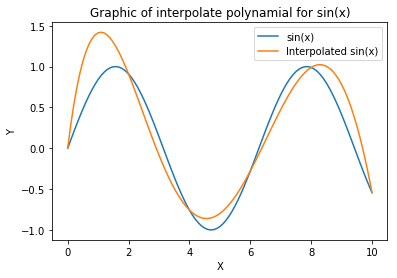

╒═══════════════╤═════════════════╕
│             x │          x^3+2x │
╞═══════════════╪═════════════════╡
│  0.0000000000 │    0.0000000000 │
├───────────────┼─────────────────┤
│  2.0000000000 │   12.0000000000 │
├───────────────┼─────────────────┤
│  4.0000000000 │   72.0000000000 │
├───────────────┼─────────────────┤
│  6.0000000000 │  228.0000000000 │
├───────────────┼─────────────────┤
│  8.0000000000 │  528.0000000000 │
├───────────────┼─────────────────┤
│ 10.0000000000 │ 1020.0000000000 │
╘═══════════════╧═════════════════╛
╒══════════════╤════════════════╤═══════════════════════════╤══════════════════╤══════════════════╕
│            x │         x^3+2x │   Interpolation of x^3+2x │   Relative error │   Absolute error │
╞══════════════╪════════════════╪═══════════════════════════╪══════════════════╪══════════════════╡
│ 1.0000000000 │   3.0000000000 │              3.0000000000 │     0.0000000000 │     0.0000000000 │
├──────────────┼────────────────┼───────────────────────────

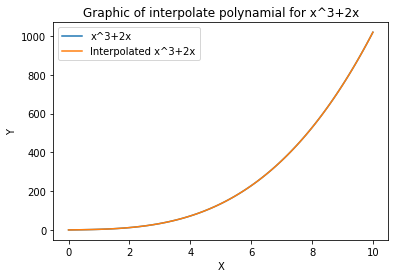

In [102]:
compare2(0, 10, 5)

Interpolacja metodą Hermite'a dla 8 węzłów:

╒═══════════════╤══════════════╕
│             x │      sqrt(x) │
╞═══════════════╪══════════════╡
│  0.0000000000 │ 0.0000000000 │
├───────────────┼──────────────┤
│  1.2500000000 │ 1.1180339887 │
├───────────────┼──────────────┤
│  2.5000000000 │ 1.5811388301 │
├───────────────┼──────────────┤
│  3.7500000000 │ 1.9364916731 │
├───────────────┼──────────────┤
│  5.0000000000 │ 2.2360679775 │
├───────────────┼──────────────┤
│  6.2500000000 │ 2.5000000000 │
├───────────────┼──────────────┤
│  7.5000000000 │ 2.7386127875 │
├───────────────┼──────────────┤
│  8.7500000000 │ 2.9580398915 │
├───────────────┼──────────────┤
│ 10.0000000000 │ 3.1622776602 │
╘═══════════════╧══════════════╛
╒══════════════╤══════════════╤════════════════════════════╤══════════════════╤══════════════════╕
│            x │      sqrt(x) │   Interpolation of sqrt(x) │   Relative error │   Absolute error │
╞══════════════╪══════════════╪════════════════════════════╪══════════════════╪══════════════════╡
│ 0.625000

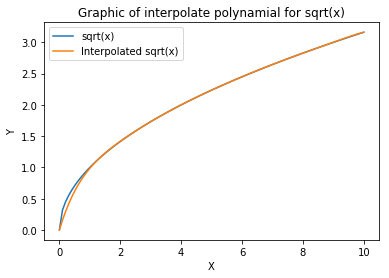

╒═══════════════╤═══════════════╕
│             x │        sin(x) │
╞═══════════════╪═══════════════╡
│  0.0000000000 │  0.0000000000 │
├───────────────┼───────────────┤
│  1.2500000000 │  0.9489846194 │
├───────────────┼───────────────┤
│  2.5000000000 │  0.5984721441 │
├───────────────┼───────────────┤
│  3.7500000000 │ -0.5715613187 │
├───────────────┼───────────────┤
│  5.0000000000 │ -0.9589242747 │
├───────────────┼───────────────┤
│  6.2500000000 │ -0.0331792165 │
├───────────────┼───────────────┤
│  7.5000000000 │  0.9379999768 │
├───────────────┼───────────────┤
│  8.7500000000 │  0.6247239538 │
├───────────────┼───────────────┤
│ 10.0000000000 │ -0.5440211109 │
╘═══════════════╧═══════════════╛
╒══════════════╤═══════════════╤═══════════════════════════╤══════════════════╤══════════════════╕
│            x │        sin(x) │   Interpolation of sin(x) │   Relative error │   Absolute error │
╞══════════════╪═══════════════╪═══════════════════════════╪══════════════════╪═════════

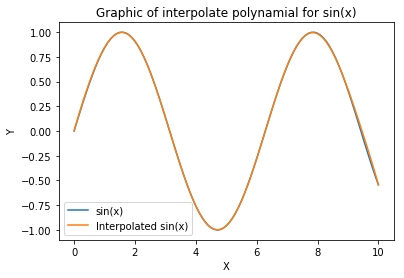

╒═══════════════╤═════════════════╕
│             x │          x^3+2x │
╞═══════════════╪═════════════════╡
│  0.0000000000 │    0.0000000000 │
├───────────────┼─────────────────┤
│  1.2500000000 │    4.4531250000 │
├───────────────┼─────────────────┤
│  2.5000000000 │   20.6250000000 │
├───────────────┼─────────────────┤
│  3.7500000000 │   60.2343750000 │
├───────────────┼─────────────────┤
│  5.0000000000 │  135.0000000000 │
├───────────────┼─────────────────┤
│  6.2500000000 │  256.6406250000 │
├───────────────┼─────────────────┤
│  7.5000000000 │  436.8750000000 │
├───────────────┼─────────────────┤
│  8.7500000000 │  687.4218750000 │
├───────────────┼─────────────────┤
│ 10.0000000000 │ 1020.0000000000 │
╘═══════════════╧═════════════════╛
╒══════════════╤════════════════╤═══════════════════════════╤══════════════════╤══════════════════╕
│            x │         x^3+2x │   Interpolation of x^3+2x │   Relative error │   Absolute error │
╞══════════════╪════════════════╪═══════════

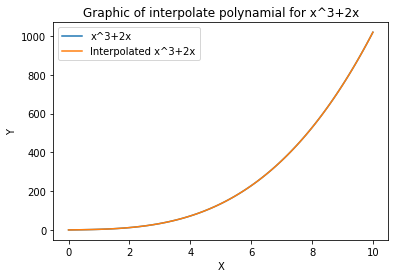

In [103]:
compare2(0, 10, 8)

#### Zadanie 3: Wyjaśnić i zademonstrować efekt Rungego 

**Efekt Rungego** (od nazwiska Carla Rungego, niemieckiego matematyka) – pogorszenie jakości interpolacji wielomianowej, mimo zwiększenia liczby jej węzłów. Początkowo ze wzrostem liczby węzłów n przybliżenie poprawia się, jednak po dalszym wzroście n, zaczyna się pogarszać, co jest szczególnie widoczne na końcach przedziałów.

Takie zachowanie się wielomianu interpolującego jest zjawiskiem typowym dla interpolacji za pomocą wielomianów wysokich stopni przy stałych odległościach węzłów. Występuje ono również, jeśli interpolowana funkcja jest nieciągła albo odbiega znacząco od funkcji gładkiej.

Ponieważ zgodnie z twierdzeniem Weierstrassa istnieje ciąg interpolujących wielomianów coraz wyższych stopni, które przybliżają jednostajnie funkcje ciągłą, można uważać to za paradoks, iż efekt Rungego ma dokładnie odwrotny wynik. Jest to spowodowane nałożeniem warunku na równoodległość węzłów.

Aby uniknąć tego efektu, stosuje się interpolację z węzłami coraz gęściej upakowanymi na krańcach przedziału interpolacji. Np. węzłami interpolacji n-punktowej wielomianowej powinny być miejsca zerowe wielomianu Czebyszewa n-tego stopnia. 

Poniżej zademonstrowałem efekt Rungego zwiększeniem ilości węzłów na przedziale.
Ilość węzłów: 50, przedział: [0, 10]

╒═══════════════╤══════════════╕
│             x │      sqrt(x) │
╞═══════════════╪══════════════╡
│  0.0000000000 │ 0.0000000000 │
├───────────────┼──────────────┤
│  0.2040816327 │ 0.4517539515 │
├───────────────┼──────────────┤
│  0.4081632653 │ 0.6388765650 │
├───────────────┼──────────────┤
│  0.6122448980 │ 0.7824607964 │
├───────────────┼──────────────┤
│  0.8163265306 │ 0.9035079029 │
├───────────────┼──────────────┤
│  1.0204081633 │ 1.0101525446 │
├───────────────┼──────────────┤
│  1.2244897959 │ 1.1065666703 │
├───────────────┼──────────────┤
│  1.4285714286 │ 1.1952286093 │
├───────────────┼──────────────┤
│  1.6326530612 │ 1.2777531300 │
├───────────────┼──────────────┤
│  1.8367346939 │ 1.3552618544 │
├───────────────┼──────────────┤
│  2.0408163265 │ 1.4285714286 │
├───────────────┼──────────────┤
│  2.2448979592 │ 1.4982983545 │
├───────────────┼──────────────┤
│  2.4489795918 │ 1.5649215929 │
├───────────────┼──────────────┤
│  2.6530612245 │ 1.6288220359 │
├─────────

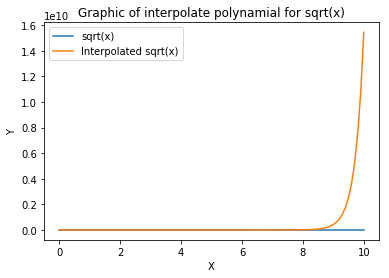

╒═══════════════╤═══════════════╕
│             x │        sin(x) │
╞═══════════════╪═══════════════╡
│  0.0000000000 │  0.0000000000 │
├───────────────┼───────────────┤
│  0.2040816327 │  0.2026679365 │
├───────────────┼───────────────┤
│  0.4081632653 │  0.3969241489 │
├───────────────┼───────────────┤
│  0.6122448980 │  0.5747060412 │
├───────────────┼───────────────┤
│  0.8163265306 │  0.7286347835 │
├───────────────┼───────────────┤
│  1.0204081633 │  0.8523215697 │
├───────────────┼───────────────┤
│  1.2244897959 │  0.9406327851 │
├───────────────┼───────────────┤
│  1.4285714286 │  0.9899030764 │
├───────────────┼───────────────┤
│  1.6326530612 │  0.9980874821 │
├───────────────┼───────────────┤
│  1.8367346939 │  0.9648463090 │
├───────────────┼───────────────┤
│  2.0408163265 │  0.8915592304 │
├───────────────┼───────────────┤
│  2.2448979592 │  0.7812680235 │
├───────────────┼───────────────┤
│  2.4489795918 │  0.6385503202 │
├───────────────┼───────────────┤
│  2.653061224

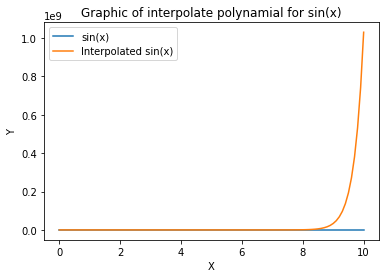

╒═══════════════╤═════════════════╕
│             x │          x^3+2x │
╞═══════════════╪═════════════════╡
│  0.0000000000 │    0.0000000000 │
├───────────────┼─────────────────┤
│  0.2040816327 │    0.4166631251 │
├───────────────┼─────────────────┤
│  0.4081632653 │    0.8843254086 │
├───────────────┼─────────────────┤
│  0.6122448980 │    1.4539860092 │
├───────────────┼─────────────────┤
│  0.8163265306 │    2.1766440854 │
├───────────────┼─────────────────┤
│  1.0204081633 │    3.1032987956 │
├───────────────┼─────────────────┤
│  1.2244897959 │    4.2849492983 │
├───────────────┼─────────────────┤
│  1.4285714286 │    5.7725947522 │
├───────────────┼─────────────────┤
│  1.6326530612 │    7.6172343156 │
├───────────────┼─────────────────┤
│  1.8367346939 │    9.8698671472 │
├───────────────┼─────────────────┤
│  2.0408163265 │   12.5814924054 │
├───────────────┼─────────────────┤
│  2.2448979592 │   15.8031092487 │
├───────────────┼─────────────────┤
│  2.4489795918 │   19.58571

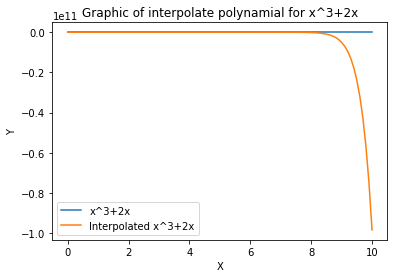

In [104]:
compare2(0, 10, 49)

#### Zadanie 4: Interpolacja funkcjami sklejanymi 
Wykorzystując bibliotekę SciPy lub NumPy wykonać interpolację danych przy pomocy B-splinów. Oszacować dokładność (błąd interpolacji). 

In [121]:
def show_graphic3(fun1, fun2, fname, min, max, n):
    x = np.linspace(min, max, n)
    y1 = np.vectorize(fun1)
    y2 = np.vectorize(fun2)

    plot.title("Graphic of interpolate polynamial for " + fname)
    plot.xlabel("X")
    plot.ylabel("Y")
    plot.plot(x, y1(x), label = fname)
    plot.plot(x, y2(x), label = "Interpolated " + fname)
    plot.legend()
    plot.show()
    
def compare_part3(fun1, fun2, fname, min, max, n):
    tab = []
    r_err = []
    a_err = []
    section = (max - min) / float(n)

    min_val = section / 2 + min
    max_val = section / 2 + max
    
    for x in np.arange(min_val, max_val, section):
        tab.append([x, fun1(x), fun2(x), abs(fun2(x) - fun1(x)) / fun1(x), 
                    abs(fun2(x) - fun1(x))])
                      
        r_err.append(abs(fun2(x) - fun1(x)) / fun1(x))
        a_err.append(abs(fun2(x) - fun1(x)))
        
    print(tabulate(tab, headers=["x", fname, "Interpolation of " + fname, "Relative error",
                                 "Absolute error"], tablefmt="fancy_grid", floatfmt=".10f"))

def calculate3(x_arr, y_arr):
    t, c, k = interpolate.splrep(x_arr, y_arr, s=0, k=2)
    return interpolate.BSpline(t, c, k, extrapolate=False)


def compare_fun3(fun, fname, min, max, n):
    x, y = into_table(fun, fname, min, max, n)
    fun2 = calculate3(x, y)
    compare_part3(fun, fun2, fname, min, max, n)
    show_graphic3(fun, fun2, fname, min, max, 100)
    

def compare3(min, max, n):   
    compare_fun3(math.sqrt, "sqrt(x)", min, max, n)
    compare_fun3(math.sin, "sin(x)", min, max, n)
    compare_fun3(lambda x: x**3 + 2*x, "x^3+2x", min, max, n)

Interpolacja metodą B-spine dla 3 węzłów:

╒═══════════════╤══════════════╕
│             x │      sqrt(x) │
╞═══════════════╪══════════════╡
│  0.0000000000 │ 0.0000000000 │
├───────────────┼──────────────┤
│  3.3333333333 │ 1.8257418584 │
├───────────────┼──────────────┤
│  6.6666666667 │ 2.5819888975 │
├───────────────┼──────────────┤
│ 10.0000000000 │ 3.1622776602 │
╘═══════════════╧══════════════╛
╒══════════════╤══════════════╤════════════════════════════╤══════════════════╤══════════════════╕
│            x │      sqrt(x) │   Interpolation of sqrt(x) │   Relative error │   Absolute error │
╞══════════════╪══════════════╪════════════════════════════╪══════════════════╪══════════════════╡
│ 1.6666666667 │ 1.2909944487 │               1.0651731262 │     0.1749204443 │     0.2258213225 │
├──────────────┼──────────────┼────────────────────────────┼──────────────────┼──────────────────┤
│ 5.0000000000 │ 2.2360679775 │               2.2817061964 │     0.0204100320 │     0.0456382189 │
├──────────────┼──────────────┼────────────

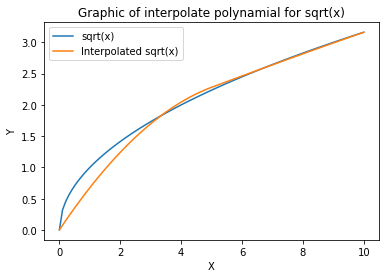

╒═══════════════╤═══════════════╕
│             x │        sin(x) │
╞═══════════════╪═══════════════╡
│  0.0000000000 │  0.0000000000 │
├───────────────┼───────────────┤
│  3.3333333333 │ -0.1905679629 │
├───────────────┼───────────────┤
│  6.6666666667 │  0.3741512306 │
├───────────────┼───────────────┤
│ 10.0000000000 │ -0.5440211109 │
╘═══════════════╧═══════════════╛
╒══════════════╤═══════════════╤═══════════════════════════╤══════════════════╤══════════════════╕
│            x │        sin(x) │   Interpolation of sin(x) │   Relative error │   Absolute error │
╞══════════════╪═══════════════╪═══════════════════════════╪══════════════════╪══════════════════╡
│ 1.6666666667 │  0.9954079578 │             -0.2363235987 │     1.2374138130 │     1.2317315565 │
├──────────────┼───────────────┼───────────────────────────┼──────────────────┼──────────────────┤
│ 5.0000000000 │ -0.9589242747 │              0.1372669075 │    -1.1431467647 │     1.0961911822 │
├──────────────┼───────────────┼

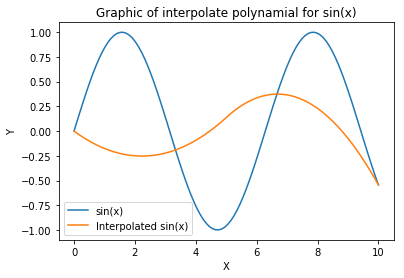

╒═══════════════╤═════════════════╕
│             x │          x^3+2x │
╞═══════════════╪═════════════════╡
│  0.0000000000 │    0.0000000000 │
├───────────────┼─────────────────┤
│  3.3333333333 │   43.7037037037 │
├───────────────┼─────────────────┤
│  6.6666666667 │  309.6296296296 │
├───────────────┼─────────────────┤
│ 10.0000000000 │ 1020.0000000000 │
╘═══════════════╧═════════════════╛
╒══════════════╤════════════════╤═══════════════════════════╤══════════════════╤══════════════════╕
│            x │         x^3+2x │   Interpolation of x^3+2x │   Relative error │   Absolute error │
╞══════════════╪════════════════╪═══════════════════════════╪══════════════════╪══════════════════╡
│ 1.6666666667 │   7.9629629630 │             -1.2962962963 │     1.1627906977 │     9.2592592593 │
├──────────────┼────────────────┼───────────────────────────┼──────────────────┼──────────────────┤
│ 5.0000000000 │ 135.0000000000 │            135.0000000000 │     0.0000000000 │     0.0000000000 │
├───

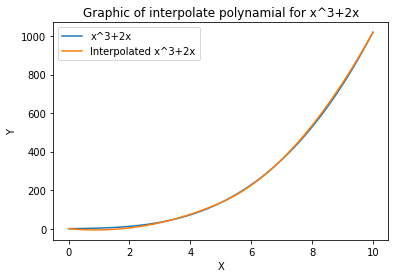

In [122]:
compare3(0, 10, 3)

Interpolacja metodą B-spine dla 4 węzłów:

╒═══════════════╤══════════════╕
│             x │      sqrt(x) │
╞═══════════════╪══════════════╡
│  0.0000000000 │ 0.0000000000 │
├───────────────┼──────────────┤
│  2.5000000000 │ 1.5811388301 │
├───────────────┼──────────────┤
│  5.0000000000 │ 2.2360679775 │
├───────────────┼──────────────┤
│  7.5000000000 │ 2.7386127875 │
├───────────────┼──────────────┤
│ 10.0000000000 │ 3.1622776602 │
╘═══════════════╧══════════════╛
╒══════════════╤══════════════╤════════════════════════════╤══════════════════╤══════════════════╕
│            x │      sqrt(x) │   Interpolation of sqrt(x) │   Relative error │   Absolute error │
╞══════════════╪══════════════╪════════════════════════════╪══════════════════╪══════════════════╡
│ 1.2500000000 │ 1.1180339887 │               0.9226650813 │     0.1747432631 │     0.1953689074 │
├──────────────┼──────────────┼────────────────────────────┼──────────────────┼──────────────────┤
│ 3.7500000000 │ 1.9364916731 │               1.9754212462 │     0.020103145

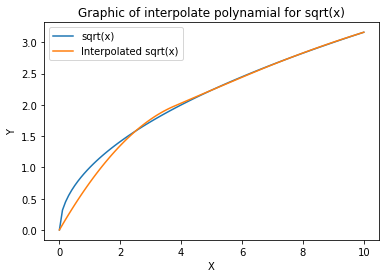

╒═══════════════╤═══════════════╕
│             x │        sin(x) │
╞═══════════════╪═══════════════╡
│  0.0000000000 │  0.0000000000 │
├───────────────┼───────────────┤
│  2.5000000000 │  0.5984721441 │
├───────────────┼───────────────┤
│  5.0000000000 │ -0.9589242747 │
├───────────────┼───────────────┤
│  7.5000000000 │  0.9379999768 │
├───────────────┼───────────────┤
│ 10.0000000000 │ -0.5440211109 │
╘═══════════════╧═══════════════╛
╒══════════════╤═══════════════╤═══════════════════════════╤══════════════════╤══════════════════╕
│            x │        sin(x) │   Interpolation of sin(x) │   Relative error │   Absolute error │
╞══════════════╪═══════════════╪═══════════════════════════╪══════════════════╪══════════════════╡
│ 1.2500000000 │  0.9489846194 │              0.7133425046 │     0.2483097302 │     0.2356421148 │
├──────────────┼───────────────┼───────────────────────────┼──────────────────┼──────────────────┤
│ 3.7500000000 │ -0.5715613187 │             -0.3446110814 │   

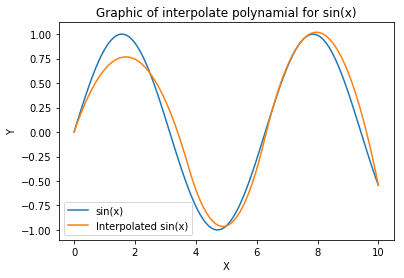

╒═══════════════╤═════════════════╕
│             x │          x^3+2x │
╞═══════════════╪═════════════════╡
│  0.0000000000 │    0.0000000000 │
├───────────────┼─────────────────┤
│  2.5000000000 │   20.6250000000 │
├───────────────┼─────────────────┤
│  5.0000000000 │  135.0000000000 │
├───────────────┼─────────────────┤
│  7.5000000000 │  436.8750000000 │
├───────────────┼─────────────────┤
│ 10.0000000000 │ 1020.0000000000 │
╘═══════════════╧═════════════════╛
╒══════════════╤════════════════╤═══════════════════════════╤══════════════════╤══════════════════╕
│            x │         x^3+2x │   Interpolation of x^3+2x │   Relative error │   Absolute error │
╞══════════════╪════════════════╪═══════════════════════════╪══════════════════╪══════════════════╡
│ 1.2500000000 │   4.4531250000 │              0.2678571429 │     0.9398496241 │     4.1852678571 │
├──────────────┼────────────────┼───────────────────────────┼──────────────────┼──────────────────┤
│ 3.7500000000 │  60.2343750000 

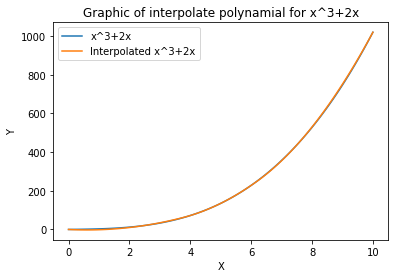

In [123]:
compare3(0, 10, 4)

Interpolacja metodą B-spine dla 5 węzłów:

╒═══════════════╤══════════════╕
│             x │      sqrt(x) │
╞═══════════════╪══════════════╡
│  0.0000000000 │ 0.0000000000 │
├───────────────┼──────────────┤
│  2.0000000000 │ 1.4142135624 │
├───────────────┼──────────────┤
│  4.0000000000 │ 2.0000000000 │
├───────────────┼──────────────┤
│  6.0000000000 │ 2.4494897428 │
├───────────────┼──────────────┤
│  8.0000000000 │ 2.8284271247 │
├───────────────┼──────────────┤
│ 10.0000000000 │ 3.1622776602 │
╘═══════════════╧══════════════╛
╒══════════════╤══════════════╤════════════════════════════╤══════════════════╤══════════════════╕
│            x │      sqrt(x) │   Interpolation of sqrt(x) │   Relative error │   Absolute error │
╞══════════════╪══════════════╪════════════════════════════╪══════════════════╪══════════════════╡
│ 1.0000000000 │ 1.0000000000 │               0.8252775520 │     0.1747224480 │     0.1747224480 │
├──────────────┼──────────────┼────────────────────────────┼──────────────────┼──────────────────┤
│ 3.000000

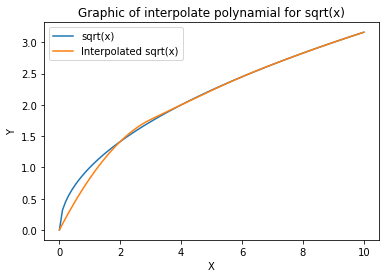

╒═══════════════╤═══════════════╕
│             x │        sin(x) │
╞═══════════════╪═══════════════╡
│  0.0000000000 │  0.0000000000 │
├───────────────┼───────────────┤
│  2.0000000000 │  0.9092974268 │
├───────────────┼───────────────┤
│  4.0000000000 │ -0.7568024953 │
├───────────────┼───────────────┤
│  6.0000000000 │ -0.2794154982 │
├───────────────┼───────────────┤
│  8.0000000000 │  0.9893582466 │
├───────────────┼───────────────┤
│ 10.0000000000 │ -0.5440211109 │
╘═══════════════╧═══════════════╛
╒══════════════╤═══════════════╤═══════════════════════════╤══════════════════╤══════════════════╕
│            x │        sin(x) │   Interpolation of sin(x) │   Relative error │   Absolute error │
╞══════════════╪═══════════════╪═══════════════════════════╪══════════════════╪══════════════════╡
│ 1.0000000000 │  0.8414709848 │              0.8805439767 │     0.0464341524 │     0.0390729919 │
├──────────────┼───────────────┼───────────────────────────┼──────────────────┼───────────────

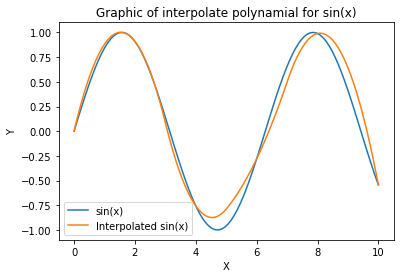

╒═══════════════╤═════════════════╕
│             x │          x^3+2x │
╞═══════════════╪═════════════════╡
│  0.0000000000 │    0.0000000000 │
├───────────────┼─────────────────┤
│  2.0000000000 │   12.0000000000 │
├───────────────┼─────────────────┤
│  4.0000000000 │   72.0000000000 │
├───────────────┼─────────────────┤
│  6.0000000000 │  228.0000000000 │
├───────────────┼─────────────────┤
│  8.0000000000 │  528.0000000000 │
├───────────────┼─────────────────┤
│ 10.0000000000 │ 1020.0000000000 │
╘═══════════════╧═════════════════╛
╒══════════════╤════════════════╤═══════════════════════════╤══════════════════╤══════════════════╕
│            x │         x^3+2x │   Interpolation of x^3+2x │   Relative error │   Absolute error │
╞══════════════╪════════════════╪═══════════════════════════╪══════════════════╪══════════════════╡
│ 1.0000000000 │   3.0000000000 │              0.8823529412 │     0.7058823529 │     2.1176470588 │
├──────────────┼────────────────┼───────────────────────────

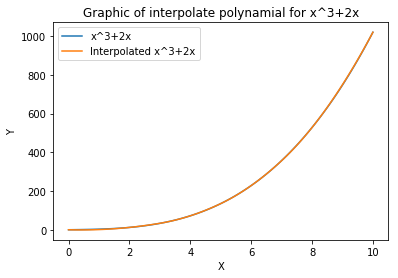

In [124]:
compare3(0, 10, 5)

Interpolacja metodą B-spine dla 8 węzłów:

╒═══════════════╤══════════════╕
│             x │      sqrt(x) │
╞═══════════════╪══════════════╡
│  0.0000000000 │ 0.0000000000 │
├───────────────┼──────────────┤
│  1.2500000000 │ 1.1180339887 │
├───────────────┼──────────────┤
│  2.5000000000 │ 1.5811388301 │
├───────────────┼──────────────┤
│  3.7500000000 │ 1.9364916731 │
├───────────────┼──────────────┤
│  5.0000000000 │ 2.2360679775 │
├───────────────┼──────────────┤
│  6.2500000000 │ 2.5000000000 │
├───────────────┼──────────────┤
│  7.5000000000 │ 2.7386127875 │
├───────────────┼──────────────┤
│  8.7500000000 │ 2.9580398915 │
├───────────────┼──────────────┤
│ 10.0000000000 │ 3.1622776602 │
╘═══════════════╧══════════════╛
╒══════════════╤══════════════╤════════════════════════════╤══════════════════╤══════════════════╕
│            x │      sqrt(x) │   Interpolation of sqrt(x) │   Relative error │   Absolute error │
╞══════════════╪══════════════╪════════════════════════════╪══════════════════╪══════════════════╡
│ 0.625000

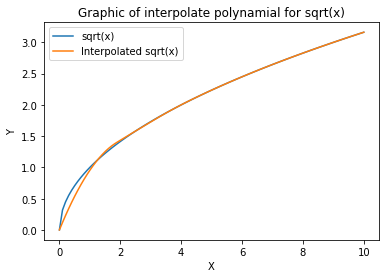

╒═══════════════╤═══════════════╕
│             x │        sin(x) │
╞═══════════════╪═══════════════╡
│  0.0000000000 │  0.0000000000 │
├───────────────┼───────────────┤
│  1.2500000000 │  0.9489846194 │
├───────────────┼───────────────┤
│  2.5000000000 │  0.5984721441 │
├───────────────┼───────────────┤
│  3.7500000000 │ -0.5715613187 │
├───────────────┼───────────────┤
│  5.0000000000 │ -0.9589242747 │
├───────────────┼───────────────┤
│  6.2500000000 │ -0.0331792165 │
├───────────────┼───────────────┤
│  7.5000000000 │  0.9379999768 │
├───────────────┼───────────────┤
│  8.7500000000 │  0.6247239538 │
├───────────────┼───────────────┤
│ 10.0000000000 │ -0.5440211109 │
╘═══════════════╧═══════════════╛
╒══════════════╤═══════════════╤═══════════════════════════╤══════════════════╤══════════════════╕
│            x │        sin(x) │   Interpolation of sin(x) │   Relative error │   Absolute error │
╞══════════════╪═══════════════╪═══════════════════════════╪══════════════════╪═════════

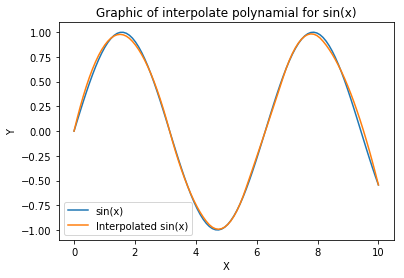

╒═══════════════╤═════════════════╕
│             x │          x^3+2x │
╞═══════════════╪═════════════════╡
│  0.0000000000 │    0.0000000000 │
├───────────────┼─────────────────┤
│  1.2500000000 │    4.4531250000 │
├───────────────┼─────────────────┤
│  2.5000000000 │   20.6250000000 │
├───────────────┼─────────────────┤
│  3.7500000000 │   60.2343750000 │
├───────────────┼─────────────────┤
│  5.0000000000 │  135.0000000000 │
├───────────────┼─────────────────┤
│  6.2500000000 │  256.6406250000 │
├───────────────┼─────────────────┤
│  7.5000000000 │  436.8750000000 │
├───────────────┼─────────────────┤
│  8.7500000000 │  687.4218750000 │
├───────────────┼─────────────────┤
│ 10.0000000000 │ 1020.0000000000 │
╘═══════════════╧═════════════════╛
╒══════════════╤════════════════╤═══════════════════════════╤══════════════════╤══════════════════╕
│            x │         x^3+2x │   Interpolation of x^3+2x │   Relative error │   Absolute error │
╞══════════════╪════════════════╪═══════════

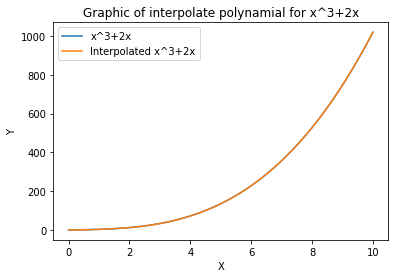

In [125]:
compare3(0, 10, 8)